In [11]:
import nltk

In [12]:
from nltk.corpus import wordnet

#### synsets: 
Synonyms of a word that we can get.

In [13]:
words = wordnet.synsets('planet')
for word in words:
    print(word.definition())
    print('\n')

(astronomy) any of the nine large celestial bodies in the solar system that revolve around the sun and shine by reflected light; Mercury, Venus, Earth, Mars, Jupiter, Saturn, Uranus, Neptune, and Pluto in order of their proximity to the sun; viewed from the constellation Hercules, all the planets rotate around the sun in a counterclockwise direction


a person who follows or serves another


any celestial body (other than comets or satellites) that revolves around a star




**Note: synonyms contained within wordnet is called lemmas**

In [14]:
words = wordnet.synsets('kettle')

for word in words:
    print(word.lemmas())
    print(word.lemma_names())
    print(word.definition(), '\n')

[Lemma('kettle.n.01.kettle'), Lemma('kettle.n.01.boiler')]
['kettle', 'boiler']
a metal pot for stewing or boiling; usually has a lid 

[Lemma('kettle.n.02.kettle'), Lemma('kettle.n.02.kettleful')]
['kettle', 'kettleful']
the quantity a kettle will hold 

[Lemma('kettle_hole.n.01.kettle_hole'), Lemma('kettle_hole.n.01.kettle')]
['kettle_hole', 'kettle']
(geology) a hollow (typically filled by a lake) that results from the melting of a mass of ice trapped in glacial deposits 

[Lemma('kettle.n.04.kettle'), Lemma('kettle.n.04.kettledrum'), Lemma('kettle.n.04.tympanum'), Lemma('kettle.n.04.tympani'), Lemma('kettle.n.04.timpani')]
['kettle', 'kettledrum', 'tympanum', 'tympani', 'timpani']
a large hemispherical brass or copper percussion instrument with a drumhead that can be tuned by adjusting the tension on it 



**Wordnet using Multilingual**

In [15]:
print(wordnet.langs())

['eng', 'als', 'arb', 'bul', 'cat', 'cmn', 'dan', 'ell', 'eus', 'fas', 'fin', 'fra', 'glg', 'heb', 'hrv', 'ind', 'ita', 'jpn', 'nld', 'nno', 'nob', 'pol', 'por', 'qcn', 'slv', 'spa', 'swe', 'tha', 'zsm']


In [16]:
words = wordnet.synsets(b'\xe7\x8a\xac'.decode('utf-8'), lang='jpn')

for word in words:
    print(word.lemma_names('jpn'))
    print(word.lemma_names('eng'))

['イヌ', 'ドッグ', '洋犬', '犬', '飼犬', '飼い犬']
['dog', 'domestic_dog', 'Canis_familiaris']
['いぬ', 'スパイ', '回者', '回し者', '密偵', '工作員', '廻者', '廻し者', '探', '探り', '犬', '秘密捜査員', 'まわし者', '諜報員', '諜者', '間者', '間諜', '隠密']
['spy', 'undercover_agent']


### Hypernyms and hyponyms: 

**Hypernyms: More generic term compared to hyponyms** 

**Hyponyms: hyponym is word or a phrase which has a more specific meaning than hypernym**

Hypernyms and hyponyms **is-a** a relation.

In [17]:
words = wordnet.synsets('kettle')

for word in words: 
    print(word.hypernyms())
    print(word.member_holonyms())

[Synset('pot.n.01')]
[]
[Synset('containerful.n.01')]
[]
[Synset('hole.n.05')]
[]
[Synset('percussion_instrument.n.01')]
[]


In [18]:
words = wordnet.synsets('system')
for word in words:
    print(word.hypernyms())
    print(word.root_hypernyms())
    print(word.member_holonyms(), '\n')

[Synset('instrumentality.n.03')]
[Synset('entity.n.01')]
[] 

[Synset('group.n.01')]
[Synset('entity.n.01')]
[] 

[Synset('matter.n.03')]
[Synset('entity.n.01')]
[] 

[Synset('method.n.01')]
[Synset('entity.n.01')]
[] 

[Synset('structure.n.03')]
[Synset('entity.n.01')]
[] 

[Synset('body_part.n.01')]
[Synset('entity.n.01')]
[] 

[Synset('plan_of_action.n.01')]
[Synset('entity.n.01')]
[] 

[Synset('live_body.n.01')]
[Synset('entity.n.01')]
[] 

[Synset('orderliness.n.01')]
[Synset('entity.n.01')]
[] 



### Word sense disambiguation:

In [19]:
from nltk.wsd import lesk

In [20]:
s = 'i went to the bank to deposit money'
lesk_context_word = lesk(s.split(), 'bank')

In [21]:
print(lesk_context_word)
print(lesk_context_word.definition())

Synset('savings_bank.n.02')
a container (usually with a slot in the top) for keeping money at home


#### Lesk algorithm from scratch: 

In [27]:
from nltk.corpus import stopwords

In [28]:
bank = 'The frog is jumping around the bank of the river'
required_word = 'bank'

word_tokens = nltk.word_tokenize(bank)
filtered_words = []

for word in word_tokens:
    if word not in stopwords.words('english'):
        filtered_words.append(word)


max_matches = 0
best_sentence = None
for word in wordnet.synsets(required_word):
    tokenized_sent = nltk.word_tokenize(word.definition())
    common_words = set(tokenized_sent).intersection(set(filtered_words))
    if (len(common_words) > max_matches):
        best_sentence = word
        max_matches = len(common_words)

best_sentence.definition()

'enclose with a bank'

### Latent semantic analysis: 

In [29]:
textCorpus = ['Seven continent planet', 'Five ocean planet', 'Asia largest continet', 'Pacific Ocean largest', 'Ocean saline water']
text_tokens = [token.split() for token in textCorpus]

In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer
transform = TfidfVectorizer()
tfidf = transform.fit_transform(textCorpus)
print(tfidf)

  (0, 9)	0.6141889663426562
  (0, 1)	0.6141889663426562
  (0, 7)	0.49552379079705033
  (1, 7)	0.5568161504458247
  (1, 3)	0.6901592662889633
  (1, 5)	0.46220770413113277
  (2, 0)	0.6141889663426562
  (2, 4)	0.49552379079705033
  (2, 2)	0.6141889663426562
  (3, 5)	0.46220770413113277
  (3, 4)	0.5568161504458247
  (3, 6)	0.6901592662889633
  (4, 5)	0.42799292268317357
  (4, 8)	0.6390704413963749
  (4, 10)	0.6390704413963749


In [31]:
from sklearn.decomposition import TruncatedSVD

In [32]:
svd = TruncatedSVD(n_components=3)
lsa = svd.fit_transform(tfidf)
print(lsa)

[[ 3.71043068e-01  6.36069088e-01 -5.03448918e-01]
 [ 6.91226804e-01  4.35823958e-01  2.58982974e-16]
 [ 3.71043068e-01 -6.36069088e-01 -5.03448918e-01]
 [ 6.91226804e-01 -4.35823958e-01 -1.78982886e-15]
 [ 5.32049147e-01 -3.50501861e-15  7.02195396e-01]]


In [33]:
# ====> Generate vectors using LSA
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components=3)
svd.fit_transform(tfidf.T)

array([[ 1.85208873e-01,  3.58266110e-01, -3.09212770e-01],
       [ 1.85208873e-01, -3.58266110e-01, -3.09212770e-01],
       [ 1.85208873e-01,  3.58266110e-01, -3.09212770e-01],
       [ 3.87708525e-01, -2.75841656e-01, -1.66321233e-15],
       [ 4.62226149e-01,  5.11594152e-01, -2.49470916e-01],
       [ 7.04370623e-01, -1.10472485e-15,  3.00534660e-01],
       [ 3.87708525e-01,  2.75841656e-01,  1.69695375e-15],
       [ 4.62226149e-01, -5.11594152e-01, -2.49470916e-01],
       [ 2.76335027e-01, -2.24821337e-15,  4.48752322e-01],
       [ 1.85208873e-01, -3.58266110e-01, -3.09212770e-01],
       [ 2.76335027e-01, -2.24821337e-15,  4.48752322e-01]])

## word2vec

In [34]:
from gensim.models.word2vec import Word2Vec
import os 
import matplotlib.pyplot as plt

In [35]:
textCorpus = ['I like upgrad', 'Upgrad has good ML program', 'Upgrad has good faculty', 'Rahim is that good faculty', 'I Like ML']
text_tokens = [word.split() for word in textCorpus]
text_tokens

[['I', 'like', 'upgrad'],
 ['Upgrad', 'has', 'good', 'ML', 'program'],
 ['Upgrad', 'has', 'good', 'faculty'],
 ['Rahim', 'is', 'that', 'good', 'faculty'],
 ['I', 'Like', 'ML']]

In [36]:
help(Word2Vec)

Help on class Word2Vec in module gensim.models.word2vec:

class Word2Vec(gensim.models.base_any2vec.BaseWordEmbeddingsModel)
 |  Word2Vec(sentences=None, corpus_file=None, size=100, alpha=0.025, window=5, min_count=5, max_vocab_size=None, sample=0.001, seed=1, workers=3, min_alpha=0.0001, sg=0, hs=0, negative=5, ns_exponent=0.75, cbow_mean=1, hashfxn=<built-in function hash>, iter=5, null_word=0, trim_rule=None, sorted_vocab=1, batch_words=10000, compute_loss=False, callbacks=(), max_final_vocab=None)
 |  
 |  Train, use and evaluate neural networks described in https://code.google.com/p/word2vec/.
 |  
 |  Once you're finished training a model (=no more updates, only querying)
 |  store and use only the :class:`~gensim.models.keyedvectors.KeyedVectors` instance in `self.wv` to reduce memory.
 |  
 |  The model can be stored/loaded via its :meth:`~gensim.models.word2vec.Word2Vec.save` and
 |  :meth:`~gensim.models.word2vec.Word2Vec.load` methods.
 |  
 |  The trained word vectors can a

In [37]:
model = Word2Vec(text_tokens, min_count=1)

In [38]:
model.wv['Upgrad']

array([ 7.9016900e-04, -2.3255458e-03,  7.9922710e-04, -1.9906370e-03,
       -3.8045424e-03, -1.0349287e-03, -2.0592397e-03, -1.0386542e-03,
        4.5100539e-03,  2.3329158e-03,  1.3752882e-03, -1.0890745e-03,
        7.4144331e-04,  4.5908676e-03,  1.5138037e-04, -8.0088421e-04,
       -4.0086061e-03,  2.7947056e-03, -1.0998478e-03, -3.3366804e-03,
        1.4677966e-03, -1.3990870e-03,  2.8503179e-03,  5.7581684e-04,
        3.2518194e-03, -4.7584954e-03,  8.6941366e-04, -1.6225907e-03,
       -5.2219268e-04,  4.1860770e-03, -2.9238532e-03,  1.9478005e-03,
       -3.1681650e-03, -3.6915122e-03,  3.0447270e-03,  3.3798758e-03,
       -4.5306035e-03, -1.5462940e-03,  2.2010433e-03,  1.8488319e-03,
        8.6296775e-04,  4.7532353e-03,  1.9862321e-03, -2.7291540e-03,
       -2.9069136e-03, -4.7538625e-03, -1.5203880e-04,  3.5707874e-03,
        2.1648204e-03, -2.6271495e-03, -1.6718570e-03, -5.4842670e-04,
       -1.3767561e-03,  4.8176730e-03,  2.1368430e-03,  1.9623698e-03,
      

In [39]:
model.wv.most_similar(['faculty'])

[('like', 0.19310399889945984),
 ('Like', 0.17624276876449585),
 ('I', 0.15665806829929352),
 ('upgrad', 0.11086973547935486),
 ('good', 0.08089747279882431),
 ('that', 0.07270504534244537),
 ('program', 0.06846922636032104),
 ('Upgrad', 0.06559135019779205),
 ('has', 0.007857931777834892),
 ('is', -0.024154655635356903)]

#### Semantic regularities captured: 

In [42]:
# =====> import text8 file

from urllib.request import urlopen

URL = ("http://mattmahoney.net/dc/text8.zip")
ARCHIVE_NAME = "text8.zip"

def download_text8(target_dir=None):
    if (target_dir == None):
        target_dir = os.path.join('~', 'GENSIM_DATA')
    target_dir = os.path.expanduser(target_dir)
    archive_path = os.path.join(target_dir, ARCHIVE_NAME)
    opener = urlopen(URL)
    with open(archive_path, 'wb') as f:
        f.write(opener.read())
    return archive_path

In [43]:
text_path = download_text8()

In [44]:
file_path = os.path.join('~', 'GENSIM_DATA/text8')
file_path

'~/GENSIM_DATA/text8'

In [45]:
from gensim.models.word2vec import Text8Corpus
sentences = Text8Corpus(file_path)
model = Word2Vec(sentences)

In [46]:
model.wv.most_similar('meeting', topn=10)

[('conference', 0.7008732557296753),
 ('meetings', 0.6858977675437927),
 ('synod', 0.6343523263931274),
 ('ceremony', 0.6189403533935547),
 ('commencement', 0.6130998134613037),
 ('session', 0.5983527898788452),
 ('signing', 0.5911296606063843),
 ('council', 0.5836823582649231),
 ('convened', 0.5833077430725098),
 ('consultation', 0.5770002603530884)]

In [47]:
model.wv.most_similar('queen')

[('princess', 0.7493656873703003),
 ('elizabeth', 0.7343113422393799),
 ('king', 0.7300397753715515),
 ('prince', 0.7217133045196533),
 ('crown', 0.680674135684967),
 ('mary', 0.6589072942733765),
 ('duchess', 0.6387004852294922),
 ('consort', 0.6315656900405884),
 ('lord', 0.619235634803772),
 ('regent', 0.601592481136322)]

In [48]:
model.wv['computer']

array([ 2.7793024 , -0.08686993,  0.05973373,  0.8296694 ,  1.0673525 ,
        0.6825147 , -2.6039577 , -0.9617494 ,  2.1265035 ,  2.021424  ,
       -0.7878816 , -1.0467973 , -0.25066805, -1.2110091 , -1.0155547 ,
        2.0126743 ,  1.0562001 ,  0.16806504, -0.48078135, -2.60769   ,
       -2.1377425 , -2.2145221 , -0.9791996 ,  1.8623862 ,  0.9964132 ,
        2.771474  ,  3.2287319 ,  2.1624627 , -0.17795558,  1.808069  ,
        2.2993567 ,  1.4123621 , -2.9134448 ,  0.4351304 , -1.9103515 ,
       -1.7319393 ,  1.9761266 , -0.7054211 , -1.593311  ,  0.5179413 ,
        1.2081876 , -1.0439299 , -0.5596501 , -0.05837123,  3.954224  ,
       -0.24699713,  0.44069588,  0.36978066, -0.445647  , -3.1470726 ,
        0.53335774, -2.361012  ,  1.8392905 , -1.0730633 , -2.7907526 ,
        0.65891016,  0.85158145, -2.1961365 , -0.92812115,  1.5950416 ,
        3.2410078 , -0.9457627 ,  1.9473404 , -0.5016214 , -1.809664  ,
        1.2236012 ,  0.8327048 , -1.4688836 ,  0.3337162 ,  1.41

In [49]:
model.wv.n_similarity('meeting', 'conference')

0.8176899

In [50]:
model.wv.most_similar(positive=['woman', 'king'], negative=['man'])

[('queen', 0.693665623664856),
 ('princess', 0.6304328441619873),
 ('prince', 0.6225016713142395),
 ('emperor', 0.6130492091178894),
 ('elizabeth', 0.5962637066841125),
 ('empress', 0.589701771736145),
 ('daughter', 0.5871102213859558),
 ('throne', 0.5866202116012573),
 ('isabella', 0.5824654698371887),
 ('sigismund', 0.5815116763114929)]

In [51]:
X = model.wv[model.wv.vocab]

In [52]:
from sklearn.decomposition import PCA

In [53]:
# ===> Dimentionality reduction: 
pca = PCA(n_components=2)
result = pca.fit_transform(X)

In [55]:
result.tolist()

[[-0.17884546518325806, 3.364095687866211],
 [0.47161903977394104, 1.5211131572723389],
 [2.4206490516662598, 1.6706243753433228],
 [3.1224095821380615, 1.1520317792892456],
 [3.819544553756714, 2.7863662242889404],
 [1.3855223655700684, 2.7853405475616455],
 [3.006835699081421, 3.8315699100494385],
 [-0.27320271730422974, 1.6022394895553589],
 [5.92889928817749, -1.713295817375183],
 [0.13107581436634064, 6.263754844665527],
 [-0.5776327848434448, 2.1274051666259766],
 [1.7360249757766724, 1.35951566696167],
 [3.3366971015930176, 1.4974778890609741],
 [1.3452961444854736, 0.8214448690414429],
 [-0.3061221241950989, -0.04256567358970642],
 [2.1723644733428955, 2.8293800354003906],
 [-0.4424193501472473, 0.09584108740091324],
 [-2.0224688053131104, 1.051672339439392],
 [-1.5603885650634766, 5.156474590301514],
 [0.638089656829834, 1.1929854154586792],
 [-0.6004152894020081, -1.1005496978759766],
 [-0.09515862911939621, 0.01291870791465044],
 [-4.692727565765381, 2.5815532207489014],
 [1

In [56]:
import random
random.seed(123)

In [57]:
ind = random.sample(range(0, len(X)), 100)
result_random = result[ind]
all_words = list(model.wv.vocab)
words = [all_words[i] for i in ind]
words

['eat',
 'verona',
 'orthodoxy',
 'relaxes',
 'exiguus',
 'repel',
 'colonization',
 'morehouse',
 'jardines',
 'fitter',
 'dweller',
 'ct',
 'zoroastrians',
 'junctions',
 'crossfire',
 'hedge',
 'genome',
 'poignant',
 'at',
 'ackerman',
 'bloemfontein',
 'keefe',
 'simplest',
 'leftist',
 'janine',
 'dandelin',
 'balto',
 'customs',
 'rita',
 'annum',
 'basins',
 'antibiotics',
 'repress',
 'harpsichords',
 'metropole',
 'staffordshire',
 'resp',
 'seward',
 'butcher',
 'elia',
 'bahamonde',
 'mousepad',
 'mcginty',
 'dystrophy',
 'fliers',
 'maintain',
 'trucker',
 'tetryl',
 'hallstatt',
 'scotton',
 'laye',
 'lcp',
 'goizueta',
 'felton',
 'shatters',
 'bones',
 'vehement',
 'tennis',
 'kryptonian',
 'excreted',
 'murinus',
 'octavio',
 'anecdotes',
 'sephardic',
 'mia',
 'corollaries',
 'debaters',
 'esse',
 'input',
 'shigella',
 'conventionally',
 'katha',
 'recently',
 'satara',
 'condense',
 'fretless',
 'virginals',
 'jeong',
 'khaldun',
 'mutinies',
 'polyanin',
 'endomorp

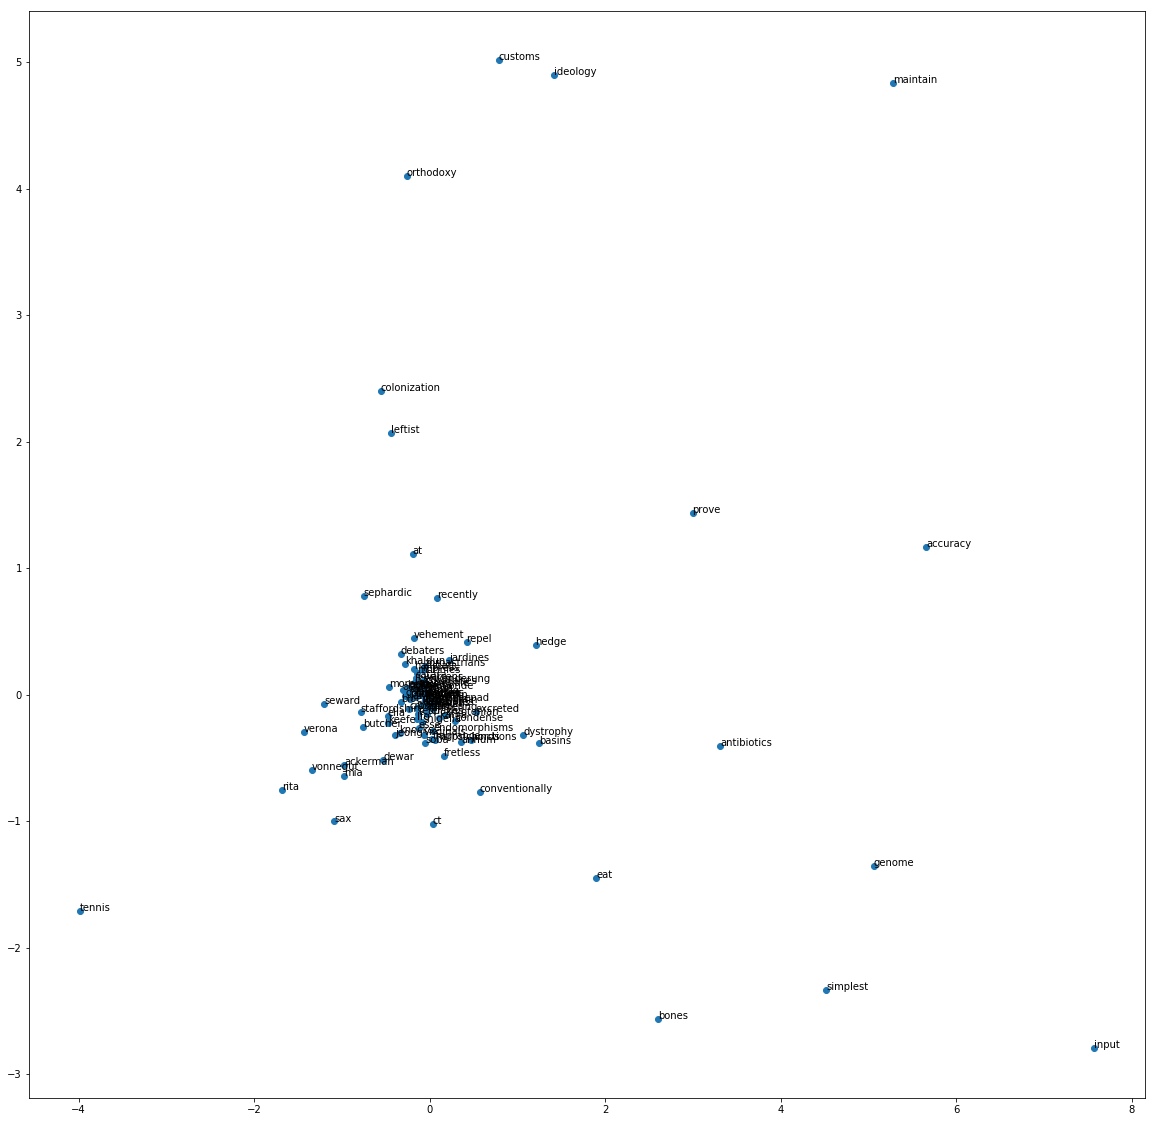

In [58]:
plt.figure(figsize=(20, 20))
plt.scatter(result_random[:, 0], result_random[:, 1])
for i, word in enumerate(words):
    plt.annotate(word, xy=(result_random[i, 0], result_random[i, 1]))
plt.show()

#### Model with vector size 50: 

In [59]:
model2 = Word2Vec(sentences, size=50)

In [60]:
model3 = Word2Vec(sentences, size=300)

In [61]:
print("\n Model with vector default size \n:")
print(model.wv.most_similar(positive=['woman', 'king'], negative=['man']))
print("\n Model with vector size 50 ")
print(model2.wv.most_similar(positive=['woman', 'king'], negative=['man']))
print("\n Model with vector size 300 ")
print(model3.wv.most_similar(positive=['woman', 'king'], negative=['man']))


 Model with vector default size 
:
[('queen', 0.693665623664856), ('princess', 0.6304328441619873), ('prince', 0.6225016713142395), ('emperor', 0.6130492091178894), ('elizabeth', 0.5962637066841125), ('empress', 0.589701771736145), ('daughter', 0.5871102213859558), ('throne', 0.5866202116012573), ('isabella', 0.5824654698371887), ('sigismund', 0.5815116763114929)]

 Model with vector size 50 
[('prince', 0.7527000308036804), ('queen', 0.7450971603393555), ('empress', 0.7407457232475281), ('son', 0.7010347843170166), ('isabella', 0.6900959014892578), ('emperor', 0.6885149478912354), ('throne', 0.6865389943122864), ('princess', 0.6837332248687744), ('regent', 0.6822634339332581), ('viii', 0.6733502149581909)]

 Model with vector size 300 
[('queen', 0.6468744277954102), ('prince', 0.567291259765625), ('princess', 0.5601068735122681), ('isabella', 0.5475542545318604), ('elizabeth', 0.5470207929611206), ('empress', 0.5431647896766663), ('throne', 0.5399587154388428), ('daughter', 0.531594

In [62]:
import pandas as pd

### Movie reivews using word2vc

In [63]:
from nltk.corpus import brown, movie_reviews

In [64]:
# skip gram model:
model_sg = Word2Vec(sentences, sg=1)

In [65]:
model_brown = Word2Vec(brown.sents(), sg=1)
model_reviews = Word2Vec(movie_reviews.sents(), sg=1, window=5)

In [68]:
model_sg.wv.most_similar('money', topn=5)

[('credit', 0.7630125284194946),
 ('dividends', 0.7604372501373291),
 ('specie', 0.7495940327644348),
 ('repay', 0.7461877465248108),
 ('repayment', 0.743943989276886)]

In [69]:
model_brown.wv.most_similar('money', topn=5)

[('care', 0.8486089706420898),
 ('job', 0.8463981747627258),
 ('friendship', 0.8380179405212402),
 ('permission', 0.8346951007843018),
 ('chances', 0.8309653401374817)]

In [70]:
model_reviews.wv.most_similar('money', topn=5)

[('cash', 0.7365164160728455),
 ('bucks', 0.7025608420372009),
 ('ransom', 0.6767388582229614),
 ('risk', 0.6708565950393677),
 ('pact', 0.6623475551605225)]

In [71]:
model_sg.wv.most_similar('titanic', topn=5)

[('newsreel', 0.7679038047790527),
 ('buccaneer', 0.7525641918182373),
 ('showgirl', 0.7456099390983582),
 ('petherbridge', 0.7437957525253296),
 ('kidd', 0.7401689887046814)]

In [73]:
model_reviews.wv.most_similar('titanic', topn=5)

[('caligula', 0.7983949184417725),
 ('flubber', 0.7914865016937256),
 ('mummy', 0.7904785871505737),
 ('jackal', 0.7850232124328613),
 ('sphere', 0.7769988179206848)]

### Gensim:

In [74]:
from gensim.scripts.glove2word2vec import glove2word2vec

In [75]:
help(glove2word2vec)

Help on function glove2word2vec in module gensim.scripts.glove2word2vec:

glove2word2vec(glove_input_file, word2vec_output_file)
    Convert `glove_input_file` in GloVe format to word2vec format and write it to `word2vec_output_file`.
    
    Parameters
    ----------
    glove_input_file : str
        Path to file in GloVe format.
    word2vec_output_file: str
        Path to output file.
    
    Returns
    -------
    (int, int)
        Number of vectors (lines) of input file and its dimension.



# Classification of news articles: 

### Importing the necessery libraries: 

In [78]:
import os
from gensim.models import word2vec
from nltk.corpus import stopwords
import numpy as np

### Reading the data:

In [81]:
train_url = 'https://cdn.upgrad.com/UpGrad/temp/cd04044e-8945-459e-b582-029665159a16/r8-train-all-terms.txt'
test_url = 'https://cdn.upgrad.com/UpGrad/temp/fe81269b-6a02-474e-a88f-c15478e169f8/r8-test-all-terms.txt'

In [95]:
opener = urlopen(train_url)
x, y = [], []
for line in opener:
    label, text = line.decode("utf-8").split('\t')
    x.append(text)
    y.append(label)

x, y = np.array(x), np.array(y)
print('No.of training examples:', len(x))

No.of training examples: 5485


In [96]:
opener = urlopen(test_url)
x_test, y_test = [], []
for line in opener:
    label, text = line.decode('utf-8').split('\t')
    x_test.append(text)
    y_test.append(label)

x_test, y_test = np.array(x_test), np.array(y_test)
print('No.ofo test examples:', len(x_test))

No.ofo test examples: 2189


In [98]:
np.unique(y_test, return_counts=True)

(array(['acq', 'crude', 'earn', 'grain', 'interest', 'money-fx', 'ship',
        'trade'], dtype='<U8'),
 array([ 696,  121, 1083,   10,   81,   87,   36,   75]))

In [102]:
x_train = ["".join(sent) for sent in x]
print(x_train[0], '\n')
x_test_str = ["".join(sent) for sent in x_test]
print(x_test_str[0], '\n')

champion products ch approves stock split champion products inc said its board of directors approved a two for one stock split of its common shares for shareholders of record as of april the company also said its board voted to recommend to shareholders at the annual meeting april an increase in the authorized capital stock from five mln to mln shares reuter 
 

asian exporters fear damage from u s japan rift mounting trade friction between the u s and japan has raised fears among many of asia s exporting nations that the row could inflict far reaching economic damage businessmen and officials said they told reuter correspondents in asian capitals a u s move against japan might boost protectionist sentiment in the u s and lead to curbs on american imports of their products but some exporters said that while the conflict would hurt them in the long run in the short term tokyo s loss might be their gain the u s has said it will impose mln dlrs of tariffs on imports of japanese electronic

In [103]:
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import CountVectorizer

In [104]:
help(CountVectorizer)

Help on class CountVectorizer in module sklearn.feature_extraction.text:

class CountVectorizer(sklearn.base.BaseEstimator, VectorizerMixin)
 |  CountVectorizer(input='content', encoding='utf-8', decode_error='strict', strip_accents=None, lowercase=True, preprocessor=None, tokenizer=None, stop_words=None, token_pattern='(?u)\\b\\w\\w+\\b', ngram_range=(1, 1), analyzer='word', max_df=1.0, min_df=1, max_features=None, vocabulary=None, binary=False, dtype=<class 'numpy.int64'>)
 |  
 |  Convert a collection of text documents to a matrix of token counts
 |  
 |  This implementation produces a sparse representation of the counts using
 |  scipy.sparse.csr_matrix.
 |  
 |  If you do not provide an a-priori dictionary and you do not use an analyzer
 |  that does some kind of feature selection then the number of features will
 |  be equal to the vocabulary size found by analyzing the data.
 |  
 |  Read more in the :ref:`User Guide <text_feature_extraction>`.
 |  
 |  Parameters
 |  ----------

### Transform the test and training data: 

In [105]:
vectorizer = CountVectorizer(stop_words='english', max_features=100)
vectorizer.fit(x_train)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=100, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words='english',
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [106]:
x_test_str = vectorizer.transform(x_test_str)
x_train = vectorizer.transform(x_train)

In [117]:
vectorizer.vocabulary_

{'stock': 88,
 'split': 84,
 'said': 74,
 'board': 12,
 'common': 16,
 'shares': 81,
 'shareholders': 80,
 'record': 70,
 'april': 6,
 'company': 18,
 'meeting': 47,
 'increase': 39,
 'mln': 49,
 'reuter': 72,
 'sale': 75,
 'dlrs': 25,
 'price': 61,
 'share': 79,
 'buy': 14,
 'total': 93,
 'pct': 59,
 'market': 46,
 'pay': 58,
 'current': 21,
 'year': 99,
 'net': 51,
 'shr': 82,
 'cts': 20,
 'vs': 96,
 'assets': 7,
 'note': 53,
 'th': 90,
 'qtr': 66,
 'includes': 38,
 'gain': 34,
 'tax': 89,
 'international': 40,
 'oper': 56,
 'loss': 44,
 'profit': 64,
 'revs': 73,
 'avg': 8,
 'shrs': 83,
 'results': 71,
 'prior': 63,
 'dlr': 24,
 'billion': 11,
 'earnings': 27,
 'quarter': 67,
 'told': 92,
 'analysts': 5,
 'sales': 76,
 'earlier': 26,
 'president': 60,
 'acquisition': 0,
 'japan': 42,
 'corp': 19,
 'cash': 15,
 'dividend': 23,
 'march': 45,
 'new': 52,
 'today': 91,
 'operations': 57,
 'rates': 69,
 'expected': 30,
 'div': 22,
 'business': 13,
 'qtly': 65,
 'months': 50,
 'offer': 54

### Using naive bayes: 

In [118]:
from sklearn.naive_bayes import BernoulliNB

In [119]:
help(BernoulliNB)

Help on class BernoulliNB in module sklearn.naive_bayes:

class BernoulliNB(BaseDiscreteNB)
 |  BernoulliNB(alpha=1.0, binarize=0.0, fit_prior=True, class_prior=None)
 |  
 |  Naive Bayes classifier for multivariate Bernoulli models.
 |  
 |  Like MultinomialNB, this classifier is suitable for discrete data. The
 |  difference is that while MultinomialNB works with occurrence counts,
 |  BernoulliNB is designed for binary/boolean features.
 |  
 |  Read more in the :ref:`User Guide <bernoulli_naive_bayes>`.
 |  
 |  Parameters
 |  ----------
 |  alpha : float, optional (default=1.0)
 |      Additive (Laplace/Lidstone) smoothing parameter
 |      (0 for no smoothing).
 |  
 |  binarize : float or None, optional (default=0.0)
 |      Threshold for binarizing (mapping to booleans) of sample features.
 |      If None, input is presumed to already consist of binary vectors.
 |  
 |  fit_prior : boolean, optional (default=True)
 |      Whether to learn class prior probabilities or not.
 |   

In [121]:
y.shape

(5485,)

In [144]:
model = BernoulliNB()
model.fit(x_train, y)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [145]:
y_test_pred = model.predict(x_test_str)
y_train_pred = model.predict(x_train)

In [146]:
print("testing accuracy with bernoulli naive bayes:", accuracy_score(y_test, y_test_pred)) 
print("Training accuracy with bernoulli naive bayes:", accuracy_score(y, y_train_pred)) 

testing accuracy with bernoulli naive bayes: 0.9026952946550937
Training accuracy with bernoulli naive bayes: 0.8638103919781221


### Multinomial naive bayes: 

In [133]:
from sklearn.naive_bayes import MultinomialNB

In [138]:
multinomial_model =  MultinomialNB()
multinomial_model.fit(x_train, y)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [141]:
y_test_pred = multinomial_model.predict(x_test_str)
y_train_pred = multinomial_model.predict(x_train)

In [142]:
print("testing accuracy with bernoulli naive bayes:", accuracy_score(y_test, y_test_pred)) 
print("Training accuracy with bernoulli naive bayes:", accuracy_score(y, y_train_pred)) 

testing accuracy with bernoulli naive bayes: 0.9086340794883508
Training accuracy with bernoulli naive bayes: 0.8842297174111212


### word embedding approach: